References:

1) https://www.neuron.yale.edu/neuron/static/new_doc/programming/hocsyntax.html

2) https://www.neuron.yale.edu/neuron/static/new_doc/programming/python.html

3) https://www.neuron.yale.edu/neuron/static/py_doc/programming/python.html

4) https://www.geeksforgeeks.org/single-neuron-neural-network-python/

5) https://github.com/piazentin/ksets

6) AP - https://www.moleculardevices.com/applications/
patch-clamp-electrophysiology/what-action-potential#gref

7) https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/network/netcon.html

8) http://neupy.com/apidocs/neupy.algorithms.associative.hebb.html

9) https://qbi-software.github.io/NEURON-tutorial/lessons/network

10) https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/topology/geometry.html

11) http://www.cnel.ufl.edu/courses/EEL6814/chapter6.pdf

12) https://www.slideshare.net/mentelibre/hebbian-learning

13) http://www.diva-portal.org/smash/get/diva2:1089220/FULLTEXT02

In [118]:
pip install neuron

## Move nvninmodl files to curr_dir (for ORN)


In [119]:
# from google.colab import drive
# drive.mount('/content/drive')

In [120]:
# !ls /content/drive/My\ Drive/nrnmodl/
# !cp /content/drive/My\ Drive/nrnmodl/* /content

In [121]:
# !pwd

In [122]:
# !nrnivmodl

**Stage 1:Importing required libraries**

In [123]:
from neuron import h                     #.h is a HOC object instanced & gui from neuron can also be imported 
from neuron.units import ms,mV
h.load_file('stdrun.hoc')                #Allows us to do a high level simulation
  
import matplotlib.pyplot as plt1

import numpy as np
from scipy.stats import poisson
import seaborn as sb

from bokeh.io import output_notebook
import bokeh.plotting as plt2
output_notebook()

# import logging
# logging.basicConfig(level=logging.DEBUG)

# size=int(input('Enter no.of sets  '))
size = 15

In [124]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

### **Stage 2:Making a Neuron with specific properties**

In [125]:
# #This is the ORN class
# class ORN:
#     def __init__(self,gid,M):
#         self._gid = gid
#         self.M = M+1

#         # Set morphology
#         self.soma = h.Section(name='soma', cell=self)
#         self.axon = h.Section(name='axon', cell=self)
#         self.dendArr = [h.Section(name="dend%d" % i, cell=self) for i in range(1)]
#         self.dendriticknobArr = [h.Section(name="dendriticknob%d" % i, cell=self) for i in range(1)]
#         self.ciliumArr = [h.Section(name="cilium%d" % i, cell=self) for i in range(1)]

#         self.axon.connect(self.soma(0),0)
#         self.dendArr[0].connect(self.soma(1),0)
#         self.dendriticknobArr[0].connect(self.dendArr[0](0),1)
        
#         self.dendriticknobArr[0].nseg = 1
#         self.dendriticknobArr[0].diam = 2
#         self.dendriticknobArr[0].L = 2
#         self.dendriticknobArr[0].insert('ciliaProp')

#         for i in range(1):
#             self.ciliumArr[i].connect(self.dendriticknobArr[0](1),0)

# #         self._spike_detector = h.NetCon(self.axon(0.5)._ref_v, None, sec=self.axon)
# #         self.spike_times = h.Vector()
# #         self._spike_detector.record(self.spike_times)
# #         self.axon_v = h.Vector().record(self.axon(0.5)._ref_v)
# #         self._ncs = [] 

#         # anatomical and biophysical properties
#         self.soma.nseg = 1 
#         self.soma.L = 9 # micrometer
#         self.soma.diam = 6
#         self.soma.insert('hh1')

#         self.axon.nseg = 1
#         self.axon.L = 100
#         self.axon.diam = 1
#         self.axon.insert('hh')
    
#         self.dendArr[0].nseg = 1
#         self.dendArr[0].L = 50
#         self.dendArr[0].diam = 1.5
#         self.dendArr[0].insert('dendProp')
#         # self.dendArr[0].e_pas = -65
#         # self.dendArr[0].g_pas = 0.001

#         for i in range(1):
#             self.ciliumArr[i].nseg = 1
#             self.ciliumArr[i].diam = 0.28
#             self.ciliumArr[i].L = 200
#             self.ciliumArr[i].insert("blr300%d" % i)

#         self.tstop = 6
        
#     def __repr__(self):
#         return 'Set [{}]_ORNcell [{}]'.format(self.M,self._gid)
#         #This shows how to represent each part when called upon

In [126]:
#This class makes one cell neuron(soma,axon,dendrite)
class MCELL:
    def __init__(self, gid, M):
        self._gid = gid #Neuron no.
        self.M = M+1
        #Setting morphology
        #Creating soma,dend and axon
        self.soma=h.Section(name='soma',cell=self)
        self.dend=h.Section(name='dend',cell=self)
        self.axon=h.Section(name='axon',cell=self)
        
        self.all = [self.axon, self.soma, self.dend] 
        #list of all the sections in the cell.
        #We could explicitly specify the connection location  by self.dend.connect(self.soma(0.5))
        
        self.dend.connect(self.soma,1,0)
        self.axon.connect(self.soma,0,0)
        
        self._spike_detector = h.NetCon(self.axon(0.5)._ref_v, None, sec=self.axon)
        self.spike_times = h.Vector()
        self._spike_detector.record(self.spike_times)
        self.axon_v = h.Vector().record(self.axon(0.5)._ref_v)
        self._ncs = [] 
        
        #Defining geometry of soma
        self.soma.L = 18.8 
        self.soma.diam = 18.8 #in microns
        self.soma.nseg = 1                  #No. of segments
        
        #Defining geometry of dend
        self.dend.nseg = 1                  #No. of segments
        self.dend.L = 701.9                 #in microns
        self.dend.diam = 3.18                #in microns
        self.dendexcisyn = h.ExpSyn(self.dend(0.5))
        self.dendexcisyn.tau = 1 *ms   # tau is decay time constant
        self.dendexcisyn.e = 0    # reversal potential
        
        #Defining geometry for axon
        self.axon.nseg = 1
        self.axon.L = 152
        self.axon.diam = 3.18
        
        #Setting biophysics
        for sec in self.all:                                                  
            sec.Ra = 123    # Axial resistance in Ohm * cm                    
            sec.cm = 1      # Membrane capacitance in micro Farads / cm^2
        
        self.soma.insert('hh')            #Inserting HH neurons
        self.axon.insert('hh')
        self.dend.insert('pas')
        for seg in self.dend:                               
            seg.pas.g = 0.001  # Passive conductance in S/cm2 
            seg.pas.e = -78    # Leak reversal potential mV
        
    def __repr__(self):
        return 'Set [{}]_Mcell [{}]'.format(self.M,self._gid)
        #This shows how to represent each part when called upon

### **Uniform Distribution**

In [127]:
# from scipy.stats import uniform
# label=['Pdf','Histogram']
low, high = 0.05, 0.1
uniform_distribution = np.random.uniform(low, high,2*size-1)
print(uniform_distribution)
# Create the bins and histogram
# count, bins, ignored = plt1.hist(uniform_distribution,10)
# #plt1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
# plt1.plot(bins,uniform.pdf(bins))
# plt1.legend(label)
# plt1.xlabel('weights')
# plt1.ylabel('frequency')
# plt1.grid()
# plt1.show()
# print(uniform_distribution)

[0.08423704 0.07825837 0.09604061 0.07891523 0.08359804 0.08991887
 0.08312337 0.08303663 0.08136176 0.08842251 0.09670647 0.07772655
 0.09559023 0.0831932  0.05266178 0.08574054 0.09526824 0.0725218
 0.07626826 0.05776225 0.06107065 0.07821496 0.0583808  0.06719702
 0.07718519 0.07346322 0.05326282 0.09288289 0.06847901]


In [128]:
weights = uniform_distribution
print(weights)

[0.08423704 0.07825837 0.09604061 0.07891523 0.08359804 0.08991887
 0.08312337 0.08303663 0.08136176 0.08842251 0.09670647 0.07772655
 0.09559023 0.0831932  0.05266178 0.08574054 0.09526824 0.0725218
 0.07626826 0.05776225 0.06107065 0.07821496 0.0583808  0.06719702
 0.07718519 0.07346322 0.05326282 0.09288289 0.06847901]


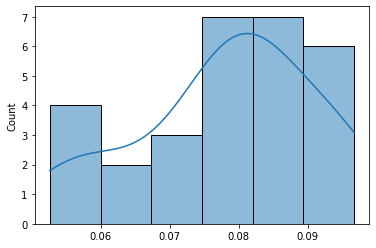

In [129]:
sb.histplot(weights, kde=True)

## **Stage 3.5 : Make different sorts of inputs**

In [130]:
def stairstep(lo: float, hi: float, duration: int, max_duration: int = 200, noise: list = []) -> list:
    # duration and max_duration are in ms
    ans = [lo if i < duration else hi for i in range(0,max_duration)]
    if len(noise) == 0:
        return ans
    else:
        assert len(ans) == len(noise)
        return [ans[i]+noise[i] for i in range(len(ans))]
    # return [0+0.8*(i/duration) if i < duration else 0 for i in range(0,max_duration)]
    # visualize input 

**Stage 4: Coupling a neuron according to Freeman's KI Set with the weights given above**

In [131]:
#Gives one 2 coupled neuron using freeman's topology in olfactory bulb
class CONNECTING:

    def __init__(self,M,weights,delay1=1,delay2=1):
        wMM=weights[0]
        
        self.M = M #Set no.
        self.th = -70
        self.maindelay = 0
        
        #Making 2 neurons
        self.cells=[]
        self.P1=MCELL(1,self.M)
        self.P2=MCELL(2,self.M)
        self.cells.append(self.P1)
        self.cells.append(self.P2)
        
        #Giving current pulse
        self.stim = h.IClamp(self.P1.dend(0.5))
        self.noise = np.random.normal(0, 0.01, 100)
        self.input = h.Vector(stairstep(0,1,10,100,self.noise))
        self.tv = h.Vector([i for i in range(100)])
        self.stim.delay = 10
        self.stim.dur = 101
        self.stim.amp = 0
        self.input.play(self.stim._ref_amp, self.tv, True) 
        
                
        #Connecting P1 to P2
        self.nc1 = h.NetCon(self.P1.axon(0.5)._ref_v,self.P2.dendexcisyn,sec=self.P1.axon)   # P1.axon to P2.dend
        self.nc1.weight[0] = weights[M]
        print("mutual weight is ", weights[M])
        self.nc1.delay = 0.1 #tP1P2
        self.nc1.threshold = self.th
        
        #Connecting P2 to P1
        self.nc2 = h.NetCon(self.P2.axon(0.5)._ref_v,self.P1.dendexcisyn,sec=self.P2.axon)    #P2.axon to P1.dend
        self.nc2.weight[0] = weights[M]
        self.nc2.delay = 0.3 #tP2P1
        self.nc2.threshold = self.th    

            

**Stage 5: Laterally connect each set of 2 coupled neurons according to Freeman's KI Set**

In [132]:
class LATERAL:

    def __init__(self,N,weights):
        wMML=weights
        #wMML=0.1
        
        self.N = N
        self.th = -70
        self.maindelay = 20
        self.sets = []
        c=0
        for i in range(N):
            self.sets.append(CONNECTING(i,weights))
        
        self.netConArr = []
        for r in range(0,N-1):
          #Connecting P1[0] to P1[1]
          # make a list for easier access
          netConList = []
          netConList.append(h.NetCon(self.sets[r].P1.axon(0.5)._ref_v, self.sets[r+1].P1.dendexcisyn,sec=self.sets[r].P1.axon))
          netConList[0].weight[0]  = wMML[r+N]
          print("Lateral weight is", wMML[r+N])
          netConList[0].delay = self.maindelay+1
          netConList[0].threshold = self.th

          netConList.append(h.NetCon(self.sets[r+1].P1.axon(0.5)._ref_v, self.sets[r].P1.dendexcisyn, sec=self.sets[r+1].P1.axon))
          netConList[1].weight[0] = wMML[r+N]
          netConList[1].delay = self.maindelay+2
          netConList[1].threshold = self.th

          self.netConArr.append(netConList)

          # exec(f"self.nc11_{r} = h.NetCon(getattr(self.sets[r].P1.axon(0.5), '_ref_v'), self.sets[1+r].P1.dendexcisyn,sec=self.sets[r].P1.axon)")
          # exec(f"self.nc11_{r}.weight[0] = wMML[r+N]")
          # print("lateral weight is", wMML[r+N])
          # exec(f"self.nc11_{r}.delay = self.maindelay+1")
          # exec(f"self.nc11_{r}.threshold = self.th")
          # exec(f"self.nc12_{r} = h.NetCon(getattr(self.sets[1+r].P1.axon(0.5), '_ref_v'), self.sets[r].P1.dendexcisyn,sec=self.sets[1+r].P1.axon)")
          # exec(f"self.nc12_{r}.weight[0] = wMML[r+N]")
          # #print(wMML[r+N])
          # exec(f"self.nc12_{r}.delay = self.maindelay+2")
          # exec(f"self.nc12_{r}.threshold = self.th")

**Stage 6: Input the number of 2 coupled sets required (which are all laterally connected)**

In [133]:
#Give N value to get N no. of 2 coupled neurons laterally connected
given_input_from_user =size #  int(input('Enter the number of 2 coupled sets required: '))
L1=LATERAL(given_input_from_user,weights)
print(weights)

mutual weight is  0.08423703822341566
mutual weight is  0.07825836796973215
mutual weight is  0.0960406088714338
mutual weight is  0.07891522543261272
mutual weight is  0.08359803713323416
mutual weight is  0.08991887182447852
mutual weight is  0.08312336631741143
mutual weight is  0.08303662944262608
mutual weight is  0.08136176172662982
mutual weight is  0.088422505749309
mutual weight is  0.09670647429788073
mutual weight is  0.0777265492774641
mutual weight is  0.09559023462943472
mutual weight is  0.08319320246112422
mutual weight is  0.05266177677779535
Lateral weight is 0.08574053510067359
Lateral weight is 0.09526824383547752
Lateral weight is 0.07252180181463644
Lateral weight is 0.07626826264818351
Lateral weight is 0.057762251115369964
Lateral weight is 0.06107065389421939
Lateral weight is 0.0782149609099301
Lateral weight is 0.058380802406076786
Lateral weight is 0.06719702051127184
Lateral weight is 0.07718519318449599
Lateral weight is 0.07346322211985411
Lateral weight 

**Stage 7: Visualize the topology of the neurons and the 3D space they are in. Also visualize the density mechanisms added to each neuron of a set**

In [134]:
# h.topology()

In [135]:
from neuron import h, gui2
gui2.set_backend('jupyter')
ps = gui2.PlotShape()
ps.variable('v')
ps.show(0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:
recording_cell = L1.sets[0].stim
graph = h.Vector().record(recording_cell._ref_i)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(300*ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(graph), line_width=2,legend_label='Input',line_color='black')
plt2.show(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

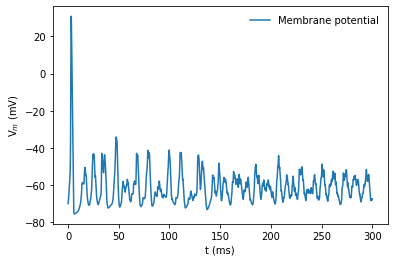

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

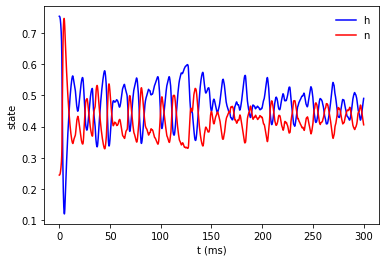

<IPython.core.display.Javascript object>

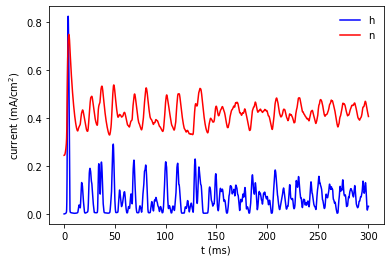

In [137]:
import numpy as np
from matplotlib import pyplot

vvecAArr=[]
kvecAArr=[]
mvecAArr=[]
hvecAArr=[]
nvecAArr=[]
for i in L1.sets:
    for cell in i.cells:
        checkCell = cell.axon(0.5)
        vvecAArr.append(h.Vector().record(checkCell._ref_v))
        kvecAArr.append(h.Vector().record(checkCell.k_ion._ref_ik))
        # nvecA = h.Vector().record(checkCell.na_ion._ref_ina)
        mvecAArr.append(h.Vector().record(checkCell.hh._ref_m))
        hvecAArr.append(h.Vector().record(checkCell.hh._ref_h))
        nvecAArr.append(h.Vector().record(checkCell.hh._ref_n))

tvec = h.Vector().record(h._ref_t)

h.finitialize(-70)
h.continuerun(300)

vvecMean = np.mean(vvecAArr,axis=0)
hvecMean = np.mean(hvecAArr,axis=0)
nvecMean = np.mean(nvecAArr,axis=0)
kvecMean = np.mean(kvecAArr,axis=0)

fig = pyplot.figure()
pyplot.plot(tvec, vvecMean, label="Membrane potential")
pyplot.xlabel('t (ms)')
pyplot.ylabel('V$_m$ (mV)')
pyplot.legend(frameon=False)

fig = pyplot.figure()
pyplot.plot(tvec, hvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('state')
pyplot.legend(frameon=False)


fig = pyplot.figure()
pyplot.plot(tvec, kvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('current (mA/cm$^2$)')
pyplot.legend(frameon=False)

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

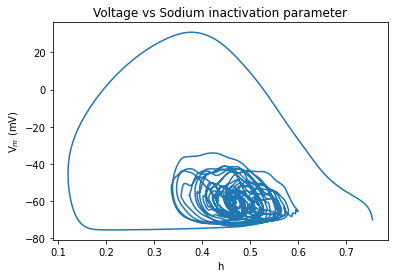

In [138]:
fig = pyplot.figure()
pyplot.plot(hvecMean, vvecMean, label="")
pyplot.xlabel('h')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Sodium inactivation parameter')
pyplot.legend(frameon=False)

No handles with labels found to put in legend.


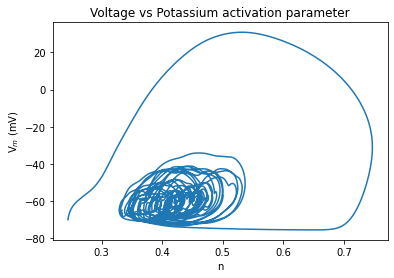

In [139]:
fig = pyplot.figure()
pyplot.plot(nvecMean, vvecMean, label="")
pyplot.xlabel('n')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Potassium activation parameter')
pyplot.legend(frameon=False)

**Stage 8: Record & visualize the voltage values at each axon and dendride**

In [140]:
recording_cell = L1.sets[4].P1
print("The voltage at P1's axon:", recording_cell.axon(0.5).v)
axon_P1 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
print("The voltage at P1's dendrite:", recording_cell.dend(0.5).v)
dend_P1 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(300 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_P1), line_width=1,legend_label='P1 axon',line_color='black')
f.line(t, list(dend_P1), line_width=2,legend_label='P1 dend',line_color='red', line_dash='dashed')
plt2.show(f)

The voltage at P1's axon: -58.56229004319877
The voltage at P1's dendrite: -56.19271277620452


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [141]:
recording_cell = L1.sets[4].P2
axon_P2 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
dend_P2 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(300 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_P2), line_width=1,legend_label='P2 axon',line_color='black')
f.line(t, list(dend_P2), line_width=2,legend_label='P2 dend',line_color='red', line_dash='dashed')
plt2.show(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

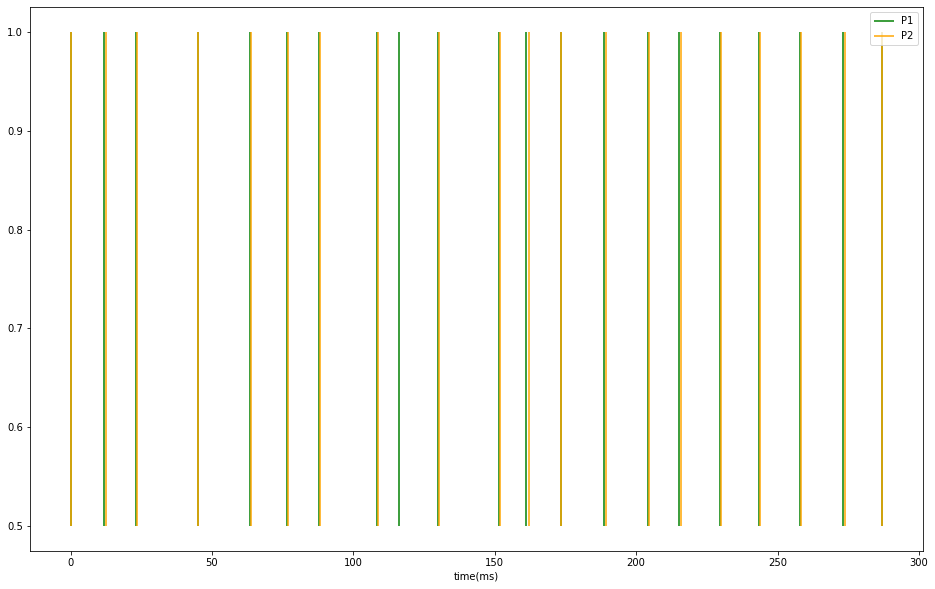

In [142]:
color=['green','orange']
label=['P1','P2']
plt1.figure(figsize=(16,10))
for j in range(1):
  #for i,cell in enumerate(L1.sets[j].cells):
    plt1.vlines(L1.sets[j].cells[0].spike_times+(100*j), 0.5, 1,color=color[0]) # for P1
    plt1.vlines(L1.sets[j].cells[1].spike_times+(100*j), 0.5, 1, color=color[1])
plt1.xlabel('time(ms)')
plt1.legend(label)


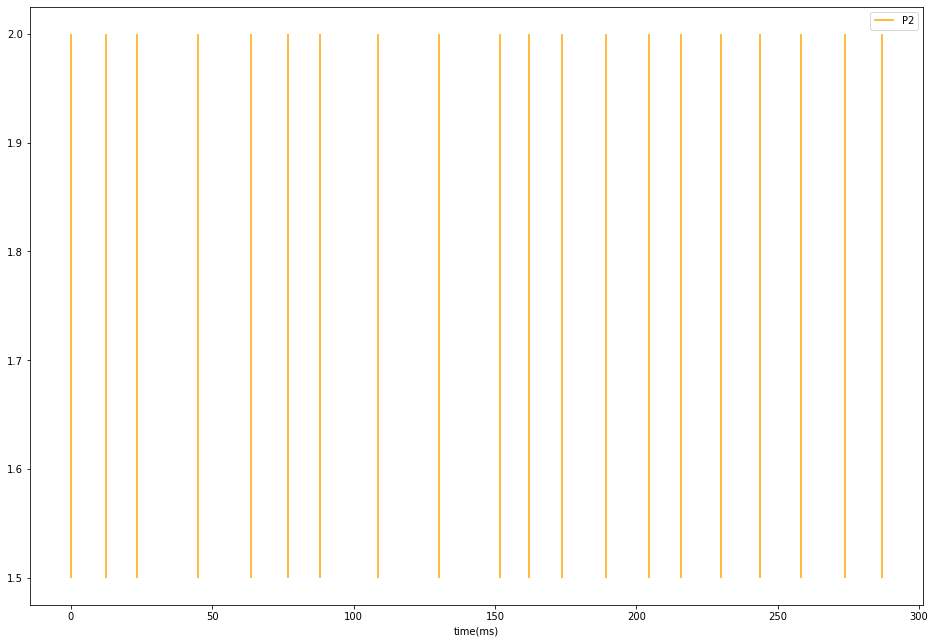

In [143]:
color=['green','orange']
label=['P2']
plt1.figure(figsize=(16,11))
for j in range(1):
  #for i,cell in enumerate(L1.sets[j].cells):
    plt1.vlines(L1.sets[j].cells[1].spike_times+(100*j), 1.5, 2,color=color[1]) # for P2
plt1.xlabel('time(ms)')
plt1.legend(label)

## Weights before learning

In [144]:
%load_ext google.colab.data_table
import pandas
P1_spike_times = list(L1.sets[0].cells[0].spike_times)
P2_spike_times = list(L1.sets[0].cells[1].spike_times)

padding = len(P1_spike_times) - len(P2_spike_times)
P2_spike_times.extend([0 for i in range(padding)]) if padding > 0 else P1_spike_times.extend([0 for i in range(-padding)])
# print(len(P1_spike_times), len(P2_spike_times))
data = {'P1 before learning': P1_spike_times, 'P2 before learning' : P2_spike_times}
pandas.DataFrame(data)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


P1 before learning  P2 before learning
0                0.025               0.025
1               11.975              12.575
2               23.275              23.550
3               44.900              45.125
4               63.350              63.675
5               76.375              76.950
6               88.000              88.250
7              108.350             108.625
8              116.225             130.175
9              129.925             151.800
10             151.575             162.125
11             161.175             173.575
12             173.300             189.175
13             188.750             204.450
14             204.275             215.775
15             215.050             230.000
16             229.800             243.825
17             243.300             258.175
18             257.975             273.725
19             273.300             287.025
20             286.800               0.000

### **Before learning Firing rate**

In [145]:
fr_P1=[0 for i in range(len(L1.sets))]
fr_P2=[0 for i in range(len(L1.sets))]
for f in range(len(L1.sets)):
  t=list(L1.sets[f].cells[0].spike_times)
  #print("spikes of p1", t)
  t1=list(L1.sets[f].cells[1].spike_times)
  #print("spikes of p2", t1)
  fr_P1[f]=(len(t)/100)*1000
  fr_P2[f]=(len(t1)/100)*1000
#print("frequencies of P1 in each set", fr_P1)
#print("frequencies of P2 in each set", fr_P2)

c=[0 for i in range(size*2)]
for i in range(size):
  c[i*2]=fr_P1[i]
  c[i*2+1]=fr_P2[i]
print("Frequencies of each neuron before learning", c)

Frequencies of each neuron before learning [210.0, 200.0, 220.0, 220.0, 200.0, 200.0, 200.0, 190.0, 200.0, 200.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 200.0, 220.0, 220.0, 220.0, 220.0, 220.0, 210.0, 230.0, 220.0, 220.0, 190.0, 210.0, 200.0]


## Population Activity (Before Learning)

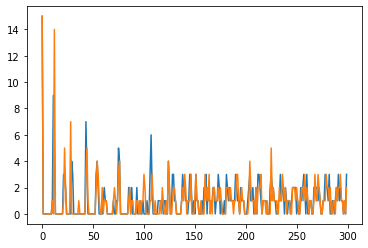

In [146]:
resolution = 1
import numpy as np
import math
M1_spike_times = [0 for i in range(0,300,resolution)]
M2_spike_times = [0 for i in range(0,300,resolution)]
for cell in L1.sets:
    for i in list(cell.cells[0].spike_times):
        M1_spike_times[math.floor(i)] += 1
    for i in list(cell.cells[1].spike_times):
        M2_spike_times[math.floor(i)] += 1
# M2_spike_times = np.array([list(cell.cells[1].spike_times) for cell in L1.sets])

import matplotlib.pyplot as plt
plt.plot(M1_spike_times)
plt.plot(M2_spike_times)

In [147]:
def generate_L_weight_delta(first, second):
    A_plus = 0.01
    A_minus = -0.0011
    tau_pre =20*ms
    tau_post =20*ms
    delta_t = [(second[iter] - first[iter]) for iter in range(min(len(first),len(second)))]
    delta_w_list = [A_plus*math.exp(-delta_t[iter]/tau_post) if delta_t[iter] >=0 else A_minus*math.exp(delta_t[iter]/tau_pre) for iter in range(min(len(first),len(second)))]  
    delta_w = sum(delta_w_list)
    return delta_w

### **Stage 9:Learning**

In [148]:
# epochs = 50
# import numpy as np
# import math
# out_1_1_data = []
# A_plus = 0.01      #0.2 to 2.5
# A_minus = -0.01
# tau_pre = 20*ms
# tau_post = 20*ms

# weights_rec = [[0 for i in range(epochs)] for j in range(len(L1.sets))]
# weights_rec_2 = [[0 for i in range(epochs)] for j in range(len(L1.sets))]
# L_weights_rec= [[0 for i in range(epochs)] for j in range(len(L1.sets)-1)]
# L_weights_rec_2= [[0 for i in range(epochs)] for j in range(len(L1.sets)-1)]

# for l in range(epochs):  
#     print("\niteration no is",l)
#     P1_data = []
#     print("\nmutual learning")
#     for i in range(len(L1.sets)):
#         h.continuerun(300 *ms)
#         out_1_1 = h.Vector().record(L1.sets[i].P1.axon(0.5)._ref_v)
#         # print("Spike times P{0}".format(1+i*2), list(L1.sets[i].P1.spike_times))
#         spike_1_1 = list(L1.sets[i].P1.spike_times)
#         out_1_2 = h.Vector().record(L1.sets[i].P2.dend(0.5)._ref_v)
#         spike_1_2 = list(L1.sets[i].P2.spike_times)
#         # print("Spike times P{0}".format(2+i*2), list(L1.sets[i].P2.spike_times))
#         t = h.Vector().record(h._ref_t)
#         h.finitialize(-70 * mV)
        
#         for k in range(1,3):
#             delta_t = [(spike_1_2[iter] - spike_1_1[iter]) for iter in range(min(len(spike_1_1),len(spike_1_2)))]
#             delta_w_list = [A_plus*math.exp(-delta_t[iter]/tau_post) if delta_t[iter] >=0.24 else A_minus*math.exp(delta_t[iter]/tau_pre) for iter in range(min(len(spike_1_1),len(spike_1_2)))]
#             delta_w = sum(delta_w_list)
#             exec(f"L1.sets[i].nc{k}.weight[0] += delta_w")         
#         P1_data.append(list(out_1_1))
#         print("weight:", L1.sets[i].nc1.weight[0])
#         weights_rec[i][l] = L1.sets[i].nc1.weight[0]
#         weights_rec_2[i][l] = L1.sets[i].nc2.weight[0]    



# #Lateral Learning
#     print("\tlateral learning")
#     for i in range(len(L1.sets)-1):
#       h.continuerun(300 *ms)
#       out_1_1 = h.Vector().record(L1.sets[i].P1.axon(0.5)._ref_v)
#       print("Spike times P{0}".format(1+2*i), list(L1.sets[i].P1.spike_times))
#       spike_1_1 = list(L1.sets[i].P1.spike_times)
#       out_2_1 = h.Vector().record(L1.sets[i+1].P1.axon(0.5)._ref_v)
#       print("Spike times P{0}".format(3+2*i), list(L1.sets[i+1].P1.spike_times))
#       spike_2_1 = list(L1.sets[i+1].P1.spike_times)
#       h.finitialize(-70 * mV)

#       # change the deltas
      
#       L1.netConArr[i][0].weight[0] += generate_L_weight_delta(spike_1_1, spike_2_1)
#       L1.netConArr[i][1].weight[0] += generate_L_weight_delta(spike_1_1, spike_2_1)

#       # Logging work

#       print(L1.netConArr[i][0].weight[0])
#       L_weights_rec[i][l] = L1.netConArr[i][0].weight[0]
#       L_weights_rec[i][l] = L1.netConArr[i][1].weight[0]
#       # exec(f"L1.nc11_{i}.weight[0] += generate_L_weight_delta(spike_1_1, spike_2_1)")
#       # exec(f"L1.nc12_{i}.weight[0] += generate_L_weight_delta(spike_1_1, spike_2_1)")
#       # exec(f"L1.nc11_{i}.weight[0] += generate_L_weight_delta(spike_M1_data[i], spike_M1_data[i+1])")
#       # exec(f"L1.nc12_{i}.weight[0] += generate_L_weight_delta(spike_M1_data[i+1], spike_M1_data[i])")
#       # print("lateral weight is : ",L1.nc11_0.weight[0])  
#       # L_weights_rec[i][l] = L1.nc11_0.weight[0]
#       # L_weights_rec_2[i][l]=L1.nc12_i.weight[0] 
#       # exec(f"print(L1.nc11_{i}.weight[0])")
#       # exec(f"L_weights_rec[i][l]=L1.nc11_{i}.weight[0]")
#       # exec(f"L_weights_rec_2[i][l]=L1.nc12_{i}.weight[0]")

In [149]:
import sys, time
tick = time.time()
epochs = 30
weight_data = []

out = display(progress(0, epochs), display_id=True)

for l in range(epochs):
    #print("iteration no is",l)
    out.update(progress(l, epochs))    
    # print("\nmutual learning")
    P1_axon_data = []
    P1_dend_data = []
    P2_axon_data = []
    P2_dend_data = []
    M1_axon_data = []
    M1_dend_data = []
    M2_axon_data = []
    M2_dend_data = []
    G1_axon_data = []
    G1_dend_data = []
    G2_axon_data = []
    G2_dend_data = []
    P1_spike_times = []
    P2_spike_times = []
    M1_spike_times = []
    M2_spike_times = []
    G1_spike_times = []
    G2_spike_times = []

    h.finitialize(-70* mV)
    h.continuerun(300*ms)
    t = h.Vector().record(h._ref_t)
    
    for i in range(len(L1.sets)):
        P1_axon_data.append(list(h.Vector().record(L1.sets[i].P1.axon(0.5)._ref_v)))
        P1_dend_data.append(list(h.Vector().record(L1.sets[i].P1.dend(0.5)._ref_v)))
        P1_spike_times.append(list(L1.sets[i].P1.spike_times))
        P2_axon_data.append(list(h.Vector().record(L1.sets[i].P2.axon(0.5)._ref_v)))
        P2_spike_times.append(list(L1.sets[i].P2.spike_times))
        P2_dend_data.append(list(h.Vector().record(L1.sets[i].P2.dend(0.5)._ref_v)))
   
    # h.finitialize(-70 * mV)

    for i in range(len(L1.sets)):
        # 2-coupled STDP-based learning
        L1.sets[i].nc1.weight[0] += generate_L_weight_delta(P1_spike_times[i], P2_spike_times[i])
        # logging
        # print("P1_axon", P1_spike_times[i], P2_spike_times[i])
        L1.sets[i].nc2.weight[0] += generate_L_weight_delta(P2_spike_times[i], P1_spike_times[i])
        
    # do a proper logging function
    weight_data.append(L1.sets[0].nc1.weight[0])


    #Lateral Learning
    for i in range(len(L1.sets)-1):
        # 2-coupled part
        L1.netConArr[i][0].weight[0] += generate_L_weight_delta(P1_spike_times[i], P1_spike_times[i+1])
        L1.netConArr[i][1].weight[0] += generate_L_weight_delta(P1_spike_times[i+1], P1_spike_times[i])
    

out.update(progress(epochs, epochs))    
tock = time.time()
print("The time it took to learn", tock-tick, "seconds")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The time it took to learn 10.517598390579224 seconds


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [150]:
l1=[]
l2=[]
for i in range(size):
  l1.append(L1.sets[i].nc1.weight[0])
  l2.append(L1.sets[i].nc2.weight[0])
print(l1)
print(l2)

<IPython.core.display.Javascript object>

[6.526468429632185, 6.267656186865801, 4.8234994051116145, 6.7035172047746885, 6.038536552844822, 5.68509582320121, 5.911431044089333, 6.469662162552516, 6.886676274031699, 6.572179457658836, 6.833837539856201, 6.60202102468658, 6.902127244084435, 6.062937685903903, 6.492333814853325]
[0.1526066322275447, 0.00838258571464811, -0.07334149498556673, 0.01879393377557592, -0.08308989860685542, -0.08323101648122708, -0.06861737171144662, -0.04479099339162665, -0.039903195870574275, -0.011312487894886336, -0.020624776724092134, 0.015945909747222216, 0.002634085116243216, -0.02248731617778485, 0.009529296240926525]


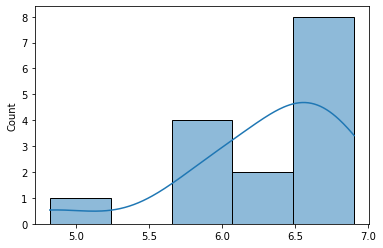

In [151]:
sb.histplot(l1, kde=True)

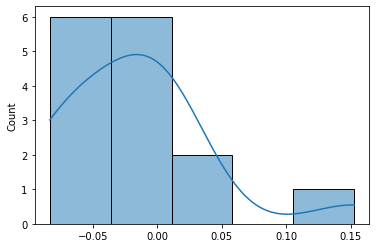

In [152]:
sb.histplot(l2, kde=True)

In [153]:
print(P1_spike_times)

[[0.025000000100000003, 11.675000000099871, 22.125000000099277, 31.75000000009873, 58.45000000010473, 80.22500000010967, 89.95000000011188, 103.00000000011485, 126.90000000012029, 133.45000000011555, 145.42500000010466, 166.3750000000856, 176.77500000007615, 188.8250000000652, 206.32500000004927, 212.72500000004345, 226.15000000003124, 241.1500000000176, 248.02500000001135, 255.6750000000044, 263.5749999999972, 269.9249999999914, 284.19999999997844, 291.3749999999719, 299.1999999999648], [0.025000000100000003, 30.275000000098814, 36.25000000009968, 49.675000000102735, 58.15000000010466, 72.37500000010789, 88.80000000011162, 111.02500000011668, 116.62500000011795, 123.17500000011944, 146.45000000010373, 154.60000000009632, 166.7000000000853, 184.27500000006933, 190.4500000000637, 197.825000000057, 203.8750000000515, 219.10000000003765, 225.80000000003156, 233.60000000002447, 241.3750000000174, 247.57500000001176, 262.1249999999985, 269.14999999999213, 276.7499999999852, 284.774999999977

In [154]:
# print(sum([len(list(cell.cells[0].spike_times)) for cell in L1.sets])/(len(L1.sets)*300))
# print(sum([len(list(cell.cells[1].spike_times)) for cell in L1.sets])/(len(L1.sets)*300))


In [155]:
## TODO: Check what kind of distribution is followed by the output

## Weights after learning

In [156]:
%load_ext google.colab.data_table
import pandas
P1_spike_times = list(L1.sets[0].cells[0].spike_times)
P2_spike_times = list(L1.sets[0].cells[1].spike_times)

padding = len(P1_spike_times) - len(P2_spike_times)
P2_spike_times.extend([0 for i in range(padding)]) if padding > 0 else P1_spike_times.extend([0 for i in range(-padding)])
# print(len(P1_spike_times), len(P2_spike_times))
data = {'P1 before learning': P1_spike_times, 'P2 before learning' : P2_spike_times}
pandas.DataFrame(data)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


P1 before learning  P2 before learning
0                0.025               0.025
1               11.675              11.900
2               22.125              22.350
3               31.750              32.000
4               58.450              55.250
5               80.225              80.350
6               89.950              90.200
7              103.000             103.200
8              126.900             126.425
9              133.450             133.775
10             145.425             145.600
11             166.375             166.500
12             176.775             177.000
13             188.825             189.050
14             206.325             206.475
15             212.725             213.050
16             226.150             226.325
17             241.150             241.325
18             248.025             248.325
19             255.675             255.850
20             263.575             263.850
21             269.925             270.300
22             284.200             284.375
23             291.375             291.650
24             299.200             299.550

In [157]:
print(weights)

[0.08423704 0.07825837 0.09604061 0.07891523 0.08359804 0.08991887
 0.08312337 0.08303663 0.08136176 0.08842251 0.09670647 0.07772655
 0.09559023 0.0831932  0.05266178 0.08574054 0.09526824 0.0725218
 0.07626826 0.05776225 0.06107065 0.07821496 0.0583808  0.06719702
 0.07718519 0.07346322 0.05326282 0.09288289 0.06847901]


**Stage 8: Record & visualize the voltage values at each axon and dendride after learning**

In [158]:
recording_cell = L1.sets[2].P1
dend_P1 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
axon_P1 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
t = h.Vector().record(h._ref_t)
print(recording_cell.axon(0.5).v)
h.finitialize(-70 * mV)
h.continuerun(200 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_P1), line_width=1,legend_label='P1 axon',line_color='black')
f.line(t, list(dend_P1), line_width=2,legend_label='P1 dend',line_color='red', line_dash='dashed')
plt2.show(f)

10.376176922882873


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [159]:
recording_cell = L1.sets[2].P2
axon_P1 = h.Vector().record(recording_cell.soma(0.5)._ref_v)
dend_P1 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(100 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_P1), line_width=1,legend_label='P2 axon',line_color='black')
f.line(t, list(dend_P1), line_width=2,legend_label='P2 dend',line_color='red', line_dash='dashed')
plt2.show(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [160]:
# print(weight_data)
f = plt2.figure(x_axis_label='epochs')
x = [i for i in range(epochs)]
f.line(x, weight_data, line_width=1, line_color='black')
plt2.show(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

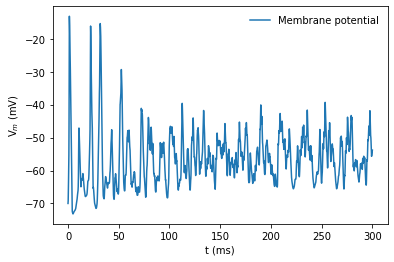

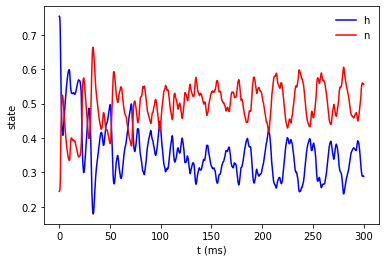

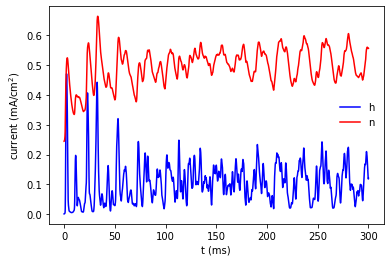

In [161]:
import numpy as np
from matplotlib import pyplot

vvecAArr=[]
kvecAArr=[]
mvecAArr=[]
hvecAArr=[]
nvecAArr=[]
for i in L1.sets:
    for cell in i.cells:
        checkCell = cell.axon(0.5)
        vvecAArr.append(h.Vector().record(checkCell._ref_v))
        kvecAArr.append(h.Vector().record(checkCell.k_ion._ref_ik))
        # nvecA = h.Vector().record(checkCell.na_ion._ref_ina)
        mvecAArr.append(h.Vector().record(checkCell.hh._ref_m))
        hvecAArr.append(h.Vector().record(checkCell.hh._ref_h))
        nvecAArr.append(h.Vector().record(checkCell.hh._ref_n))

tvec = h.Vector().record(h._ref_t)

h.finitialize(-70)
h.continuerun(300)

vvecMean = np.mean(vvecAArr,axis=0)
hvecMean = np.mean(hvecAArr,axis=0)
nvecMean = np.mean(nvecAArr,axis=0)
kvecMean = np.mean(kvecAArr,axis=0)

fig = pyplot.figure()
pyplot.plot(tvec, vvecMean, label="Membrane potential")
pyplot.xlabel('t (ms)')
pyplot.ylabel('V$_m$ (mV)')
pyplot.legend(frameon=False)

fig = pyplot.figure()
pyplot.plot(tvec, hvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('state')
pyplot.legend(frameon=False)


fig = pyplot.figure()
pyplot.plot(tvec, kvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('current (mA/cm$^2$)')
pyplot.legend(frameon=False)

No handles with labels found to put in legend.


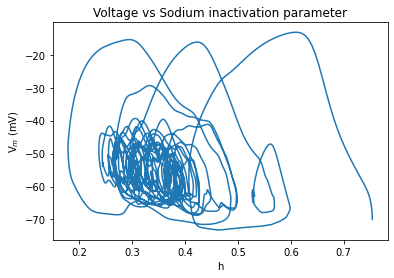

In [162]:
fig = pyplot.figure()
pyplot.plot(hvecMean, vvecMean, label="")
pyplot.xlabel('h')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Sodium inactivation parameter')
pyplot.legend(frameon=False)

No handles with labels found to put in legend.


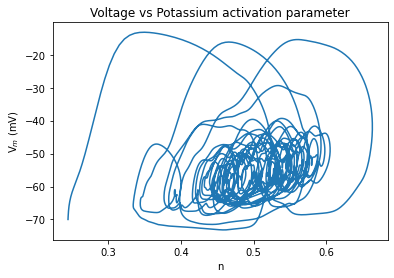

In [163]:
fig = pyplot.figure()
pyplot.plot(nvecMean, vvecMean, label="")
pyplot.xlabel('n')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Potassium activation parameter')
pyplot.legend(frameon=False)

## Population Activity

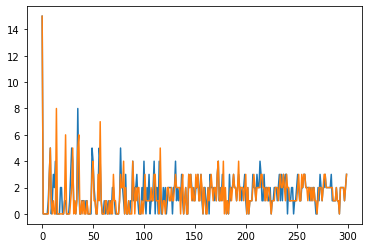

In [164]:
resolution = 1
import numpy as np
import math
M1_spike_times = [0 for i in range(0,300,resolution)]
M2_spike_times = [0 for i in range(0,300,resolution)]
for cell in L1.sets:
    for i in list(cell.cells[0].spike_times):
        M1_spike_times[math.floor(i)] += 1
    for i in list(cell.cells[1].spike_times):
        M2_spike_times[math.floor(i)] += 1
# M2_spike_times = np.array([list(cell.cells[1].spike_times) for cell in L1.sets])

import matplotlib.pyplot as plt
plt.plot(M1_spike_times)
plt.plot(M2_spike_times)

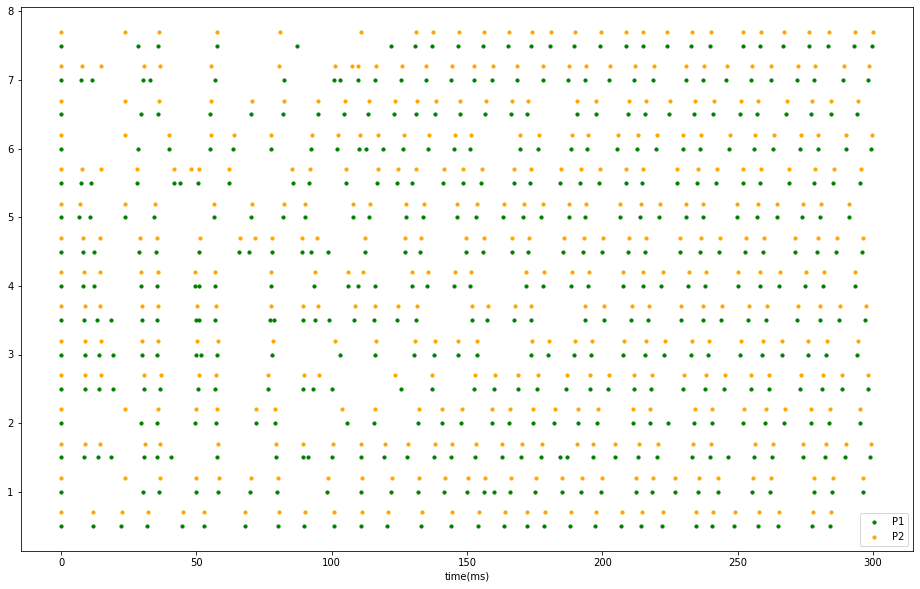

In [165]:
color=['green','orange']
label=['P1','P2']
plt1.figure(figsize=(16,10))
for j in range(len(L1.sets)):
  #for i,cell in enumerate(L1.sets[j].cells):
    plt1.scatter(L1.sets[j].cells[0].spike_times, [0.5 + 0.5*j for i in range(len(L1.sets[j].cells[0].spike_times))], s=10,color=color[0]) # for P1
    plt1.scatter(L1.sets[j].cells[1].spike_times, [0.7 + 0.5*j for i in range(len(L1.sets[j].cells[1].spike_times))], s=10, color=color[1])
plt1.xlabel('time(ms)')
plt1.legend(label)

In [166]:
# count, bins, ignored = plt1.hist(weights_rec[0], 10)
# # Plot the distribution curve
# # plt1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
# plt1.legend(label)
# plt1.xlabel('weights')
# plt1.ylabel('frequency')
# plt1.show()
# print(weights_rec[0])

In [167]:
# f = plt2.figure(x_axis_label='epoch', y_axis_label='weights')
# x = [i for i in range(len(L_weights_rec[0]))]
# f.line(x, L_weights_rec[3], line_width=1, legend_label='nc11', line_color='blue')
# f.line(x, L_weights_rec_2[0], line_width=2, legend_label='nc12', line_color='red', line_dash='dotted')
# plt2.show(f)

### **Raster scan for short intervals**

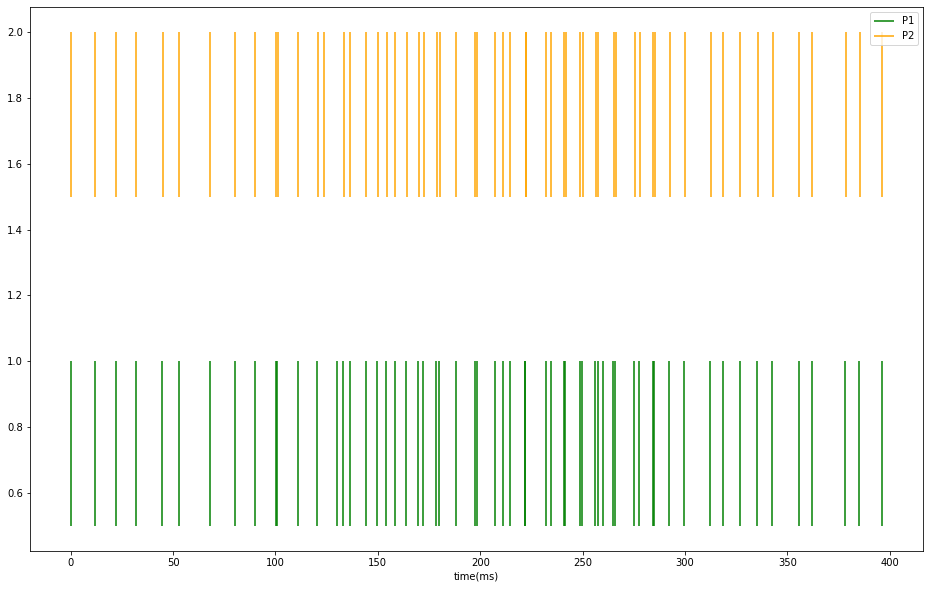

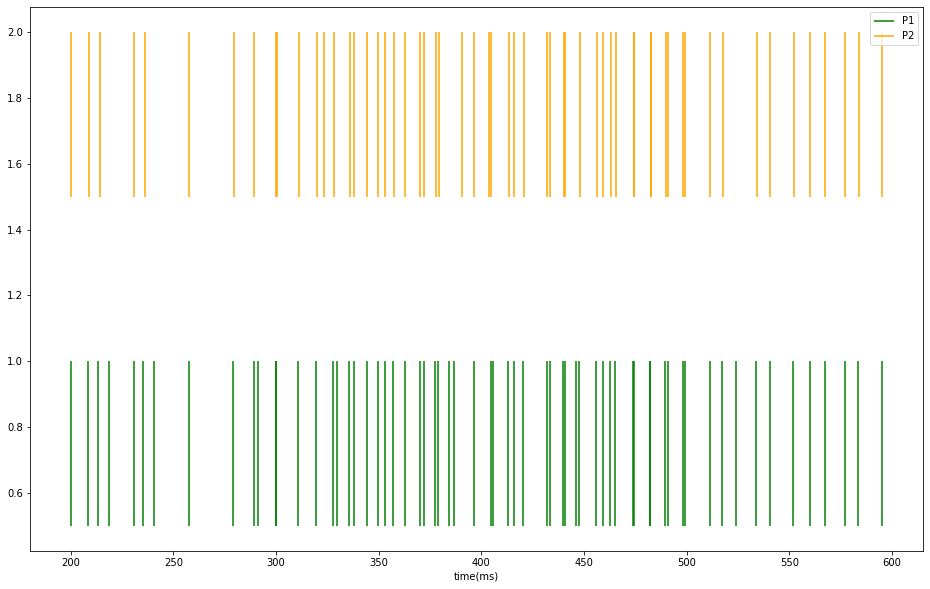

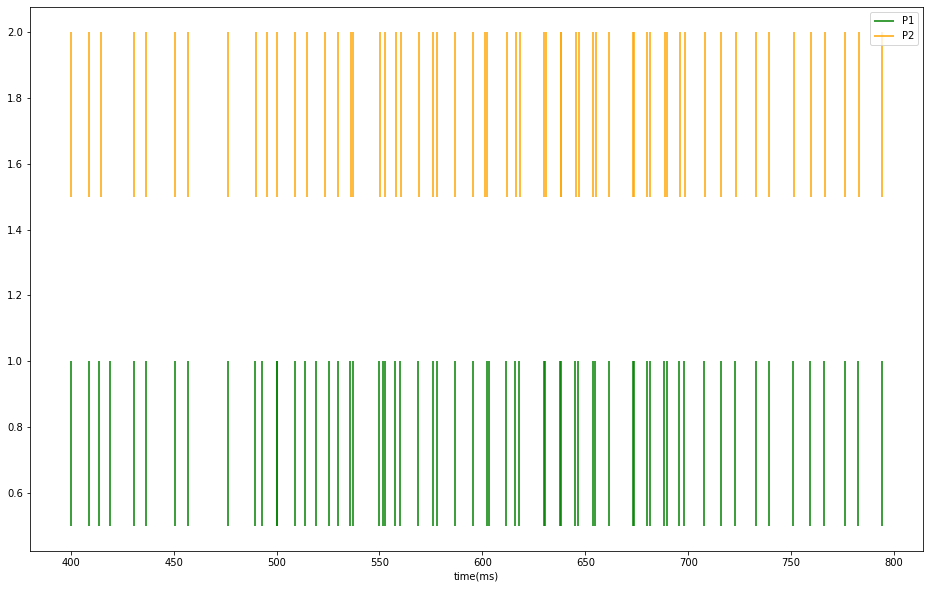

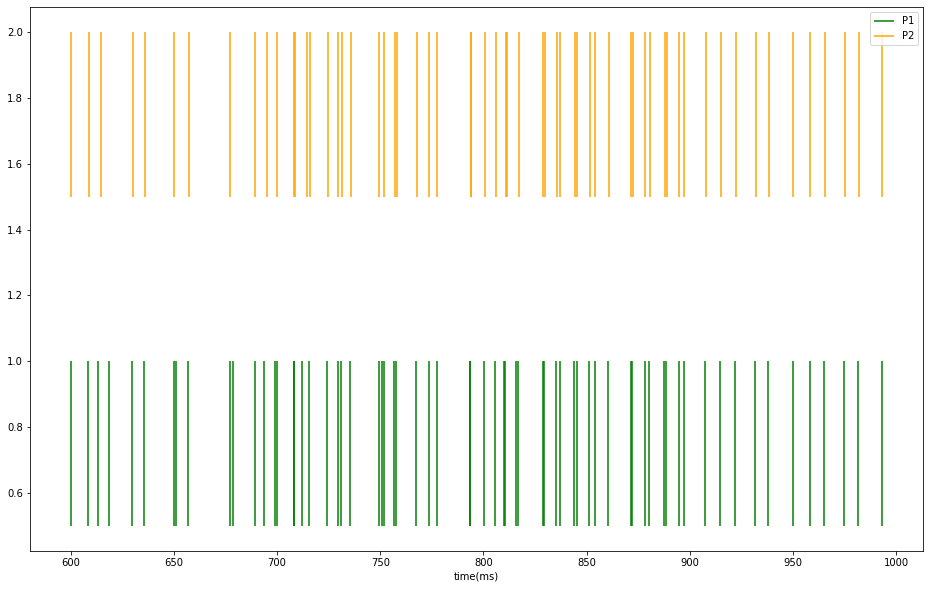

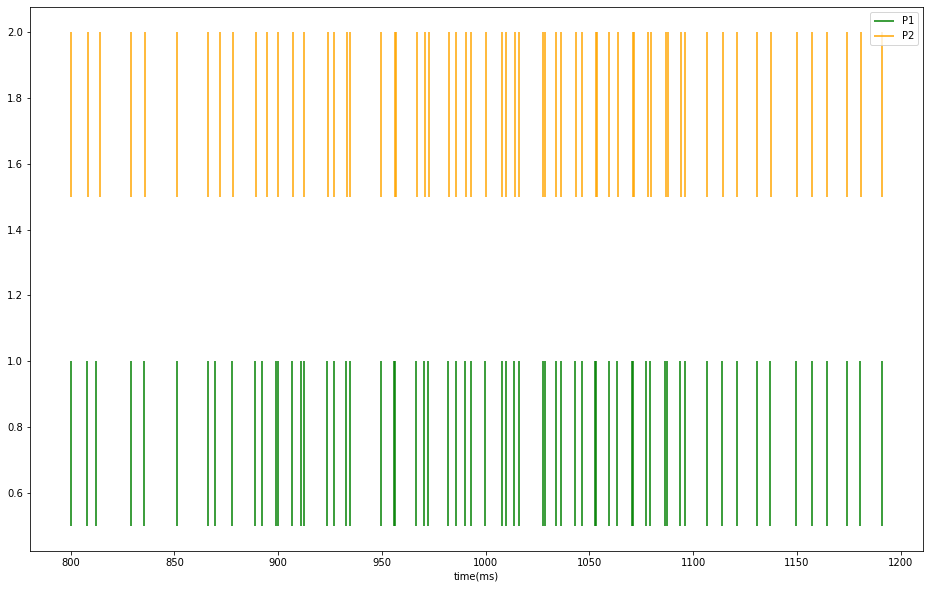

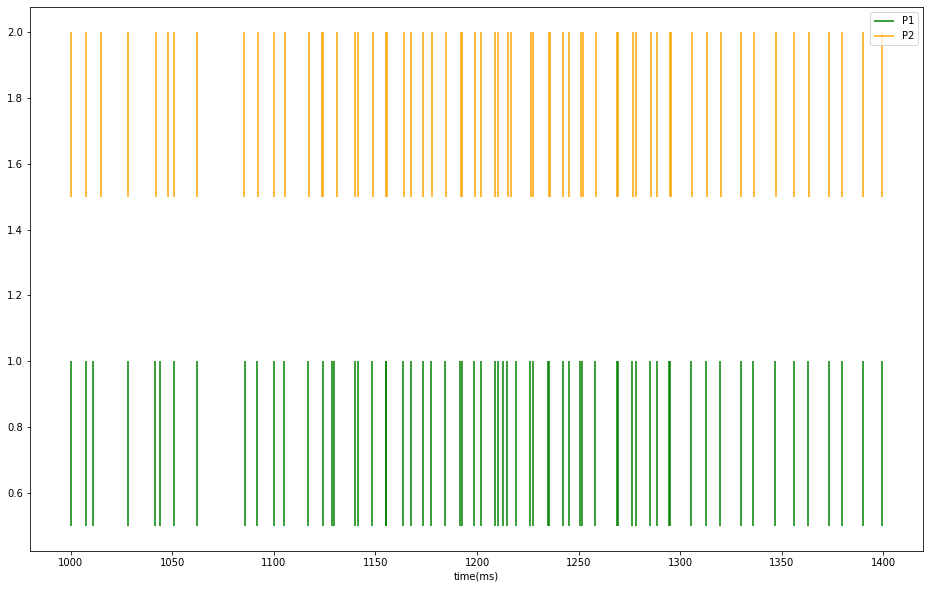

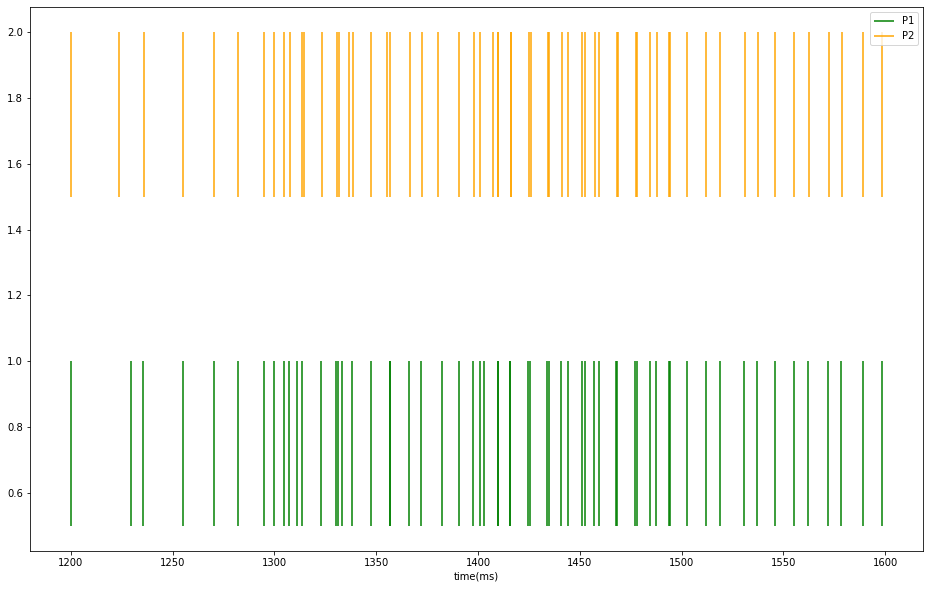

In [168]:
interval=2 #no.of pairs for each raster scan(if interval is 1 each pair would be displayed individually)
start=0
end=interval
lis=int(size/end)
for k in range(lis):
  color=['green','orange']
  label=['P1','P2']
  plt1.figure(figsize=(16,10))
  for j in range(start,end):
      for i,cell in enumerate(L1.sets[j].cells):
          plt1.vlines(cell.spike_times+(100*j), i + 0.5, i + 1,color=color[i])
  plt1.xlabel('time(ms)')
  plt1.legend(label)
  start=end
  end=end+interval


[0.025000000100000003, 11.650000000099872, 22.10000000009928, 31.75000000009873, 44.750000000101615, 52.67500000010342, 67.85000000010686, 80.20000000010967, 89.82500000011186, 100.77500000011435, 110.80000000011663, 120.45000000011882, 133.02500000011594, 144.0500000001059, 154.12500000009675, 163.750000000088, 172.1000000000804, 178.52500000007456, 188.1500000000658, 197.30000000005748, 207.0750000000486, 214.40000000004193, 221.92500000003508, 234.52500000002362, 240.700000000018, 248.80000000001064, 257.50000000000273, 264.82499999999607, 277.59999999998445, 284.19999999997844]
[0.025000000100000003, 11.650000000099872, 22.10000000009928, 31.75000000009873, 44.750000000101615, 52.67500000010342, 67.85000000010686, 80.20000000010967, 89.82500000011186, 100.77500000011435, 110.80000000011663, 120.45000000011882, 133.02500000011594, 144.0500000001059, 154.12500000009675, 163.750000000088, 172.1000000000804, 178.52500000007456, 188.1500000000658, 197.30000000005748, 207.0750000000486, 

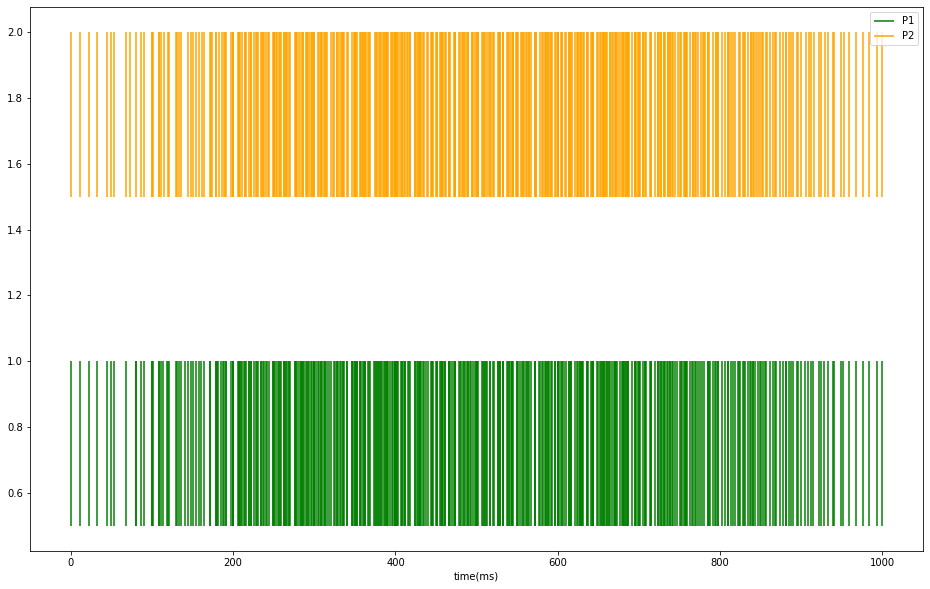

In [169]:
color=['green','orange']
label=['P1','P2']
plt1.figure(figsize=(16,10))
for j in range(given_input_from_user):
    for i,cell in enumerate(L1.sets[j].cells):
        plt1.vlines(cell.spike_times+(50*j), i + 0.5, i + 1,color=color[i])
plt1.xlabel('time(ms)')
plt1.legend(label)
t1=list(L1.sets[0].cells[0].spike_times)
t2=list(L1.sets[0].cells[0].spike_times)
print(t1)
print(t2)

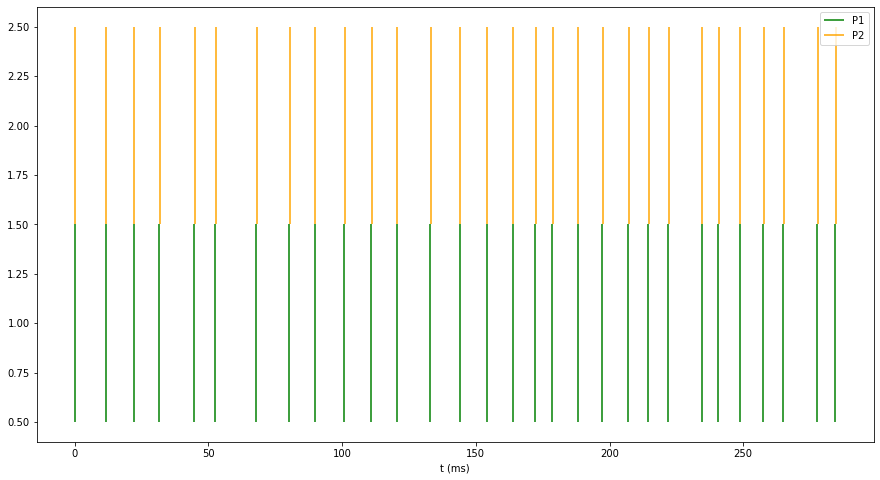

In [170]:
color=['green','orange']
label=['P1','P2']
plt1.figure(figsize=(15,8))
for i,cell in enumerate(L1.sets[0].cells):
    plt1.vlines(cell.spike_times, i + 0.5, i + 1.5,color=color[i],label=label[i])
plt1.xlabel('t (ms)')
plt1.legend()
plt1.show()

In [171]:
%load_ext google.colab.data_table
import pandas
P1_spike_times = list(L1.sets[0].cells[0].spike_times)
P2_spike_times = list(L1.sets[0].cells[1].spike_times)

padding = len(P1_spike_times) - len(P2_spike_times)
P2_spike_times.extend([0 for i in range(padding)]) if padding > 0 else P1_spike_times.extend([0 for i in range(-padding)])
# print(len(P1_spike_times), len(P2_spike_times))
data = {'P1 before learning': P1_spike_times, 'P2 before learning' : P2_spike_times}
pandas.DataFrame(data)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


P1 before learning  P2 before learning
0                0.025               0.025
1               11.650              11.875
2               22.100              22.325
3               31.750              32.000
4               44.750              44.950
5               52.675              52.950
6               67.850              68.025
7               80.200              80.400
8               89.825              90.075
9              100.775             101.000
10             110.800             111.050
11             120.450             120.700
12             133.025             133.225
13             144.050             144.275
14             154.125             154.375
15             163.750             164.000
16             172.100             172.350
17             178.525             178.875
18             188.150             188.325
19             197.300             197.550
20             207.075             207.325
21             214.400             214.675
22             221.925             222.275
23             234.525             234.700
24             240.700             241.025
25             248.800             248.925
26             257.500             257.750
27             264.825             265.125
28             277.600             277.825
29             284.200             284.500

In [172]:
n=2*size-1
final_weights=[0]*n
labels=range(2*size-1)
initial_weights =weights[0:n]
for i in range(size):
  final_weights[i]=weights_rec[i][-1]
"""
for i in range(size,2*size-1):
  final_weights.insert(i,weights[i])
"""
for i in range(size-1):
  final_weights[i+size]= L_weights_rec[i][-1]

#final_weights=final_weights[0:n]  

print(initial_weights)
print(final_weights)

plt1.figure(figsize=(16,9))
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
 
fig, ax = plt1.subplots()
rects1 = ax.bar(x - width/2,initial_weights, width, label='initial')
rects2 = ax.bar(x + width/2,final_weights , width, label='final')
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('weights')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid()
fig.tight_layout()
for i, v in enumerate(final_weights):
    ax.text(i,v, str(round(v,3)), color = 'blue', fontweight = 'bold')
for i, v in enumerate(initial_weights):
    ax.text(i-0.23,v, str(round(v,3)), color = 'red')
plt1.show()

NameError: ignored

### **After learning firing rate**

In [ ]:
fr_P1_1=[0 for i in range(len(L1.sets))]
fr_P2_1=[0 for i in range(len(L1.sets))]
c_1=[0 for i in range(size*2)]
for f in range(len(L1.sets)):
  t=list(L1.sets[f].cells[0].spike_times)
  t1=list(L1.sets[f].cells[1].spike_times)
  fr_P1_1[f]=(len(t)/100)*1000  # length of t= no.of spikes
  fr_P2_1[f]=(len(t1)/100)*1000
#print("frequencies of P1 in each set", fr_P1_1)
#print("frequencies of P2 in each set", fr_P2_1)
for i in range(size):
  c_1[i*2]=fr_P1_1[i]
  c_1[i*2+1]=fr_P2_1[i]
print("Frequencies of each neuron after learning", c_1)

In [ ]:
neuron_name=[0 for i in range(size*2)]
import plotly.graph_objects as go

for i in range(2*size):
  neuron_name[i]="p{0}".format(i+1)
print(neuron_name)

fig = go.Figure()

fig.add_trace(go.Scatter(x=neuron_name, y=c, marker=dict(color="crimson", size=9), mode="markers", name="Before Lering"))


fig.add_trace(go.Scatter(x=neuron_name, y=c_1, marker=dict(color="green", size=9), mode="markers", name="After Learning"))

fig.update_layout(title="firing rate", xaxis_title="neuron", yaxis_title="Frequency")

print("Frequencies of each neuron before learning", c)
print("Frequencies of each neuron after learning", c_1)

fig.show()

In [ ]:
label=['histogram']
n=size
labels=range(2*size)

plt1.figure(figsize=(16,9))
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
 
fig, ax = plt1.subplots()
rects1 = ax.bar(x - width/2,c, width, label='Before Learning')
rects1 = ax.bar(x + width/2,c_1, width, label='After Learning')
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('frequency in HZ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid()
fig.tight_layout()
for i, v in enumerate(c):
    ax.text(i,v, str(round(v,3)), color = 'blue', fontweight = 'bold')
    for i, v in enumerate(c_1):
      ax.text(i,v, str(round(v,3)), color = 'green', fontweight = 'bold')
plt1.show()

count, bins, ignored = plt1.hist(c, 20)
plt1.legend(label)
plt1.xlabel('firing rate')
plt1.ylabel('no of neurons')
plt1.show()

count, bins, ignored = plt1.hist(c_1, 20)
plt1.legend(label)
plt1.xlabel('firing rate')
plt1.ylabel('no of neurons')
plt1.show()


In [ ]:
"""
from scipy.stats import skew
plt1.hist(weights, bins=10)
print(weights)
print(skew(weights))
plt1.show()
"""